# <center>WIFI 신호로 현재위치 및 빌딩 추측</center>

### 분석자: 박지훈
### 분석일시: 2017.08.10
### 사용자료: UJIIndoorLoc Data Set
### 자료출처: UCL Machine Learning Repository(https://archive.ics.uci.edu/ml/datasets/ujiindoorloc)
### 분석방법: OLS(Ordinary Least Square), QDA(Quadratic Discriminant Analysis)
---

### 패키지 불러오기

In [1]:
# import packages
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import *

### 데이터 불러오기

In [2]:
# data read
raw_train = pd.read_csv("trainingData.csv")
raw_validation = pd.read_csv("validationData.csv")

In [3]:
raw_train.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [4]:
raw_validation.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7515.916799,4.864890e+06,1,1,0,0,0,0,1380872703
1,100,100,100,100,100,100,100,100,100,100,...,100,-7383.867221,4.864840e+06,4,2,0,0,0,13,1381155054
2,100,100,100,100,100,100,100,100,100,100,...,100,-7374.302080,4.864847e+06,4,2,0,0,0,13,1381155095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7365.824883,4.864843e+06,4,2,0,0,0,13,1381155138
4,100,100,100,100,100,100,100,100,100,100,...,100,-7641.499303,4.864922e+06,2,0,0,0,0,2,1380877774


---

### EDA(탐색적 시각화)

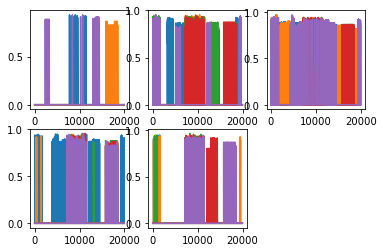

In [70]:
plt.subplot(2, 3, 1)
plt.plot(nor_train.iloc[:, :5])
plt.subplot(2, 3, 2)
plt.plot(nor_train.iloc[:, 5:10])
plt.subplot(2, 3, 3)
plt.plot(nor_train.iloc[:, 10:15])
plt.subplot(2, 3, 4)
plt.plot(nor_train.iloc[:, 15:20])
plt.subplot(2, 3, 5)
plt.plot(nor_train.iloc[:, 20:25])
plt.show()

,WAP009
0,100
1,100
2,100
3,100
4,100
5,100
6,100
7,100
8,100
9,100


In [55]:
len(raw_train.loc[1][0:520])

520

### 변수정규화
각각의 와이파이 신호는 -104부터 0의 값을 가지며 100인경우에는 신호가 잡히지 않음을 의미한다. 
최소잔자제곱법을 효과적으로 사용하기위해서 값을 정규화시킬 필요가 있다. 신호가 잡히지않으면 0, 신호가 강할 수록 1에 가깝게 정규화 시켰다. 

In [34]:
# normalization_1
nor_train = (raw_train.iloc[:, 0:520]-1)/(-105)
nor_train[nor_train == -0.9428571428571428] = 0
nor_train = nor_train.join(raw_train.iloc[:, 520:])

nor_validation = (raw_validation.iloc[:, 0:520]-1)/(-105)
nor_validation[nor_validation == -0.9428571428571428] = 0
nor_validation = nor_validation.join(raw_validation.iloc[:, 520:])

In [2]:
# normalization_2
nor_train = raw_train.iloc[:, 0:520]/(-104)
nor_train[nor_train == -0.9615384615384616] = 0
nor_train = nor_train.join(raw_train.iloc[:, 520:])

nor_validation = raw_validation.iloc[:, 0:520]/(-104)
nor_validation[nor_validation == -0.9615384615384616] = 0
nor_validation = nor_validation.join(raw_validation.iloc[:, 520:])

In [66]:
# remove null columes
check_bool_train = np.sum(nor_train.iloc[:, :520])!=0.0
#nor_train_null = nor_train.iloc[:, check_bool.values]

check_bool_validation = np.sum(nor_validation.iloc[:, :520]!=0.0)
#nor_validation_null = nor_validation.iloc[:, check_bool.values]
check = (check_bool_train | check_bool_validation == True)
check.values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

---

In [6]:
# set display option
pd.set_option('display.float_format', lambda x: '%.3f' % x)

---

### One-Hot-Encoding
층 수, 빌딩 번호는 명목변수이기 때문에 정수 표현을 위해서는 One-Hot-Encoding이 필요하다.

In [13]:
# one-hot-encoding train & test data
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(dtype=int)

train_c = raw_train.loc[:, ("FLOOR", "BUILDINGID")].values
train_c_e = ohe.fit(train_c)
train_c = train_c_e.transform(train_c).toarray()
train_c = pd.DataFrame(train_c)

validation_c = raw_validation.loc[:, ("FLOOR", "BUILDINGID")].values
validation_c = train_c_e.transform(validation_c).toarray()
validation_c = pd.DataFrame(validation_c)

---

### 데이터분할
WIFI신호세기를 통해 좌표를 추정하기 위해 train_x에는 WIFI신호를, train_y에는 좌표값을 입력하였다. 

In [14]:
# train_1
##train_y = nor_train["LONGITUDE"]
train_y = nor_train.loc[:, ("LONGITUDE", "LATITUDE")]
train_x = nor_train.iloc[:, 0:520]
train_x = train_x.join(train_c)
##train_x = sm.add_constant(train_x)

model_1 = sm.OLS(train_y, train_x).fit()


### OLS모델

In [15]:
model_1 = sm.OLS(train_y, train_x).fit()

### 예측
위에서 만든 OLS모델에 validation값을 넣어 좌표를 예측했다.

In [23]:
# test_1
validation_x = nor_validation.iloc[:, 0:520]
validation_x = validation_x.join(validation_c)
##validation_x = sm.add_constant(validation_x)

validation_y = model_1.predict(validation_x)
pd.DataFrame(validation_y, columns=["LONGITUDE", "LATITUDE"]).head()

,LONGITUDE,LATITUDE
0,-7477.431292,4.864884e+06
1,-7363.466480,4.864843e+06
2,-7367.805800,4.864840e+06
3,-7354.912291,4.864841e+06
4,-7635.897738,4.864923e+06


In [9]:
raw_validation.loc[:, ("LONGITUDE", "LATITUDE")].head()

,LONGITUDE,LATITUDE
0,-7515.917,4864889.663
1,-7383.867,4864839.740
2,-7374.302,4864846.534
3,-7365.825,4864842.829
4,-7641.499,4864922.399


---

### 예측값과 실제값의 차이

In [41]:
# GAP
validation_y = validation_y.rename(columns={0:"LONGITUDE_pre", 1:"LATITUDE_pre"})

result = validation_y.join(raw_validation.loc[:, ("LONGITUDE", "LATITUDE")])
result["LONG_Gap"] = raw_validation.loc[:, "LONGITUDE"] - validation_y.loc[:, "LONGITUDE_pre"]
result["LAT_Gap"] = raw_validation.loc[:, "LATITUDE"] - validation_y.loc[:, "LATITUDE_pre"]
result.head()

,LONGITUDE_pre,LATITUDE_pre,LONGITUDE,LATITUDE,LONG_Gap,LAT_Gap
0,-7477.431,4864883.582,-7515.917,4864889.663,-38.486,6.081
1,-7363.466,4864843.200,-7383.867,4864839.740,-20.401,-3.460
2,-7367.806,4864840.213,-7374.302,4864846.534,-6.496,6.320
3,-7354.912,4864841.143,-7365.825,4864842.829,-10.913,1.686
4,-7635.898,4864923.465,-7641.499,4864922.399,-5.602,-1.066


---

### 시각화

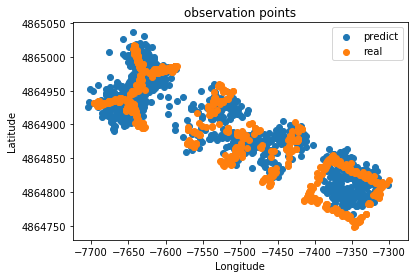

In [13]:
# Visualization_1
plt.scatter(validation_y["LONGITUDE_pre"], validation_y["LATITUDE_pre"], label = "predict")
plt.scatter(raw_validation["LONGITUDE"], raw_validation["LATITUDE"], label = "real")
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("observation points")
plt.ticklabel_format(style = "plain")
plt.show()

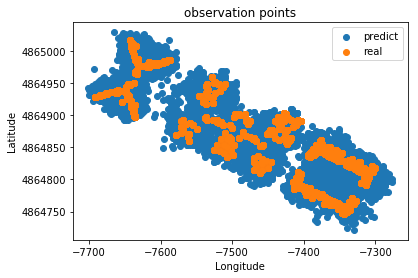

In [14]:
# Visualization_2
plt.scatter(model_1.fittedvalues.iloc[:, 0], model_1.fittedvalues.iloc[:, 1], label = "predict")
plt.scatter(raw_train["LONGITUDE"], raw_train["LATITUDE"], label = "real")
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("observation points")
plt.ticklabel_format(style = "plain")
plt.show()

---

### 분류
좌표값에 맞추어 해당 빌딩을 분류

In [15]:
# classification_1(BUILDINGID)
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
class_x = nor_train.loc[:, ("LONGITUDE", "LATITUDE")]
class_y = nor_train.loc[:, ("BUILDINGID")]
model_c = QuadraticDiscriminantAnalysis().fit(class_x, class_y)

In [16]:
# predict_1(BUILDINGID)
pre_x = nor_validation.loc[:, ("LONGITUDE", "LATITUDE")]
predict_y = model_c.predict(pre_x)
predict_y

array([1, 2, 2, ..., 0, 0, 0], dtype=int64)

### 분류값과 실제값의 차이

In [17]:
# GAP
result = pd.DataFrame(predict_y, columns=["predict"])
result["real"] = nor_validation.loc[:, "BUILDINGID"]
result["LONGITUDE"] = nor_validation.loc[:, "LONGITUDE"]
result["LATITUDE"] = nor_validation.loc[:, "LATITUDE"]
len(result[result["predict"]==result["real"]])/len(result["predict"])

1.0

In [18]:
result.head()

,predict,real,LONGITUDE,LATITUDE
0,1,1,-7515.917,4864889.663
1,2,2,-7383.867,4864839.740
2,2,2,-7374.302,4864846.534
3,2,2,-7365.825,4864842.829
4,0,0,-7641.499,4864922.399


### 분류결과보고서

In [19]:
# classify result reporting
from sklearn.metrics import *
print(classification_report(y_true=nor_validation.loc[:, "BUILDINGID"], y_pred=predict_y))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       536
          1       1.00      1.00      1.00       307
          2       1.00      1.00      1.00       268

avg / total       1.00      1.00      1.00      1111



---

### 시각화

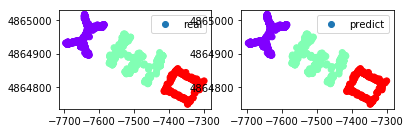

In [37]:
# Visualization
plt.subplot(221)
plt.scatter("LONGITUDE", "LATITUDE", data = result, c = "real", cmap="rainbow", label="real")
plt.legend()
plt.subplot(222)
plt.scatter("LONGITUDE", "LATITUDE", data = result, c = "predict", cmap="rainbow", label="predict")
plt.legend()
plt.show()